In [1]:
import os 

from src.problem import MultiODProblem
from src.solution import MultiODSolution
from src.utils import read_instance_data
from src.gurobi.gurobi_formulation import formulation
from src.gurobi.utils import display_gurobi_result

In [2]:
instance_dir = os.path.join('data', 'tsppdlib', 'instances', 'random-uniform')

In [3]:
instances = [i for i in os.listdir(instance_dir) if i.endswith('.tsp')]

In [22]:
instance = os.path.join(instance_dir, 'random-010-06151.tsp')

In [23]:
locations = read_instance_data(instance) 

In [24]:
p = MultiODProblem(locations=locations, ignore_to_dummy_cost=False)
p.distance_matrix

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 517 rows, 506 columns and 2710 nonzeros
Model fingerprint: 0xce6584c4
Variable types: 22 continuous, 484 integer (484 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [4e+01, 1e+03]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+01]
Presolve removed 85 rows and 75 columns
Presolve time: 0.00s
Presolved: 432 rows, 431 columns, 1972 nonzeros
Variable types: 20 continuous, 411 integer (411 binary)

Root relaxation: objective 3.011624e+03, 74 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 3011.62427    0   36          - 3011.62427      -     -    0s
     0     0 3690

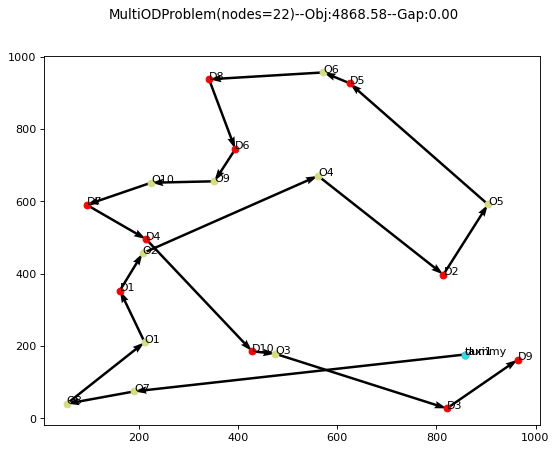

In [25]:
X, m = formulation(p, '2D')
m.optimize()
fig = display_gurobi_result(X, m, p)